# Bias Checks
This notebook will be used to check the bias for data. Curently we are having issues in which the bias extracted matches the emission shape of the data. 

Therefore we are investigating that the bias is random and has no underlying emission shape to it

## Initalisation

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import sys

sys.path.append("../src/")
from Intensity_PDF import *
from Tissue_Fluorophore import Tissue_Fluorophore
from irf_function import IRF
from spectral_sensitivity import SpectralSensitivity
from random_intensity_distrbution import IntensityPDFGenerator
from probe_config import CHANNEL_RANGE, CHANNEL_WIDTH
from bias import Bias
import numpy as np
from typing import Tuple
from visualisation_utils import (
    save_data,
    save_peak_intensities,
    plot_peak_intensity_per_channel,
    data_and_irf_inspection,
    single_data_and_irf_inspection,
    get_max_and_average_peak_intensity_per_channel,
    get_peak_intensity_per_channel,
)
from scipy import signal
from scipy import interpolate as interp
import seaborn as sns

In [8]:
intensity_range = Wavebounds(300, 1000)
bias = Bias(intensity_range=intensity_range)

In [9]:
bias_matrix = bias.get_bias_matrix()
bias_matrix

array([[58., 78., 67., ..., 50., 59., 72.],
       [47., 70., 65., ..., 74., 70., 77.],
       [53., 88., 61., ..., 63., 71., 72.],
       ...,
       [61., 65., 62., ..., 69., 54., 51.],
       [52., 65., 54., ..., 46., 57., 72.],
       [61., 69., 67., ..., 65., 77., 58.]])

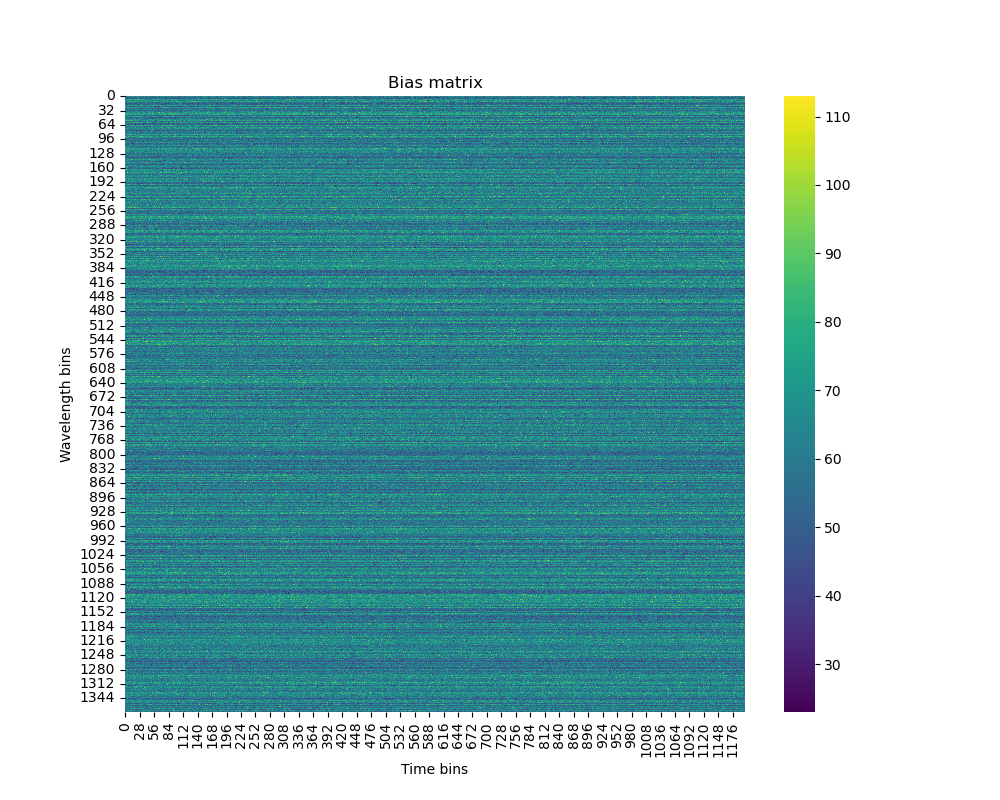

In [10]:
%matplotlib widget
plt.figure(figsize=(10, 8))
sns.heatmap(bias_matrix, cmap="viridis")
plt.title("Bias matrix")
plt.xlabel("Time bins")
plt.ylabel("Wavelength bins")
plt.show()

Average bias shape: (1375,)
Wavelengths shape: (1375,)


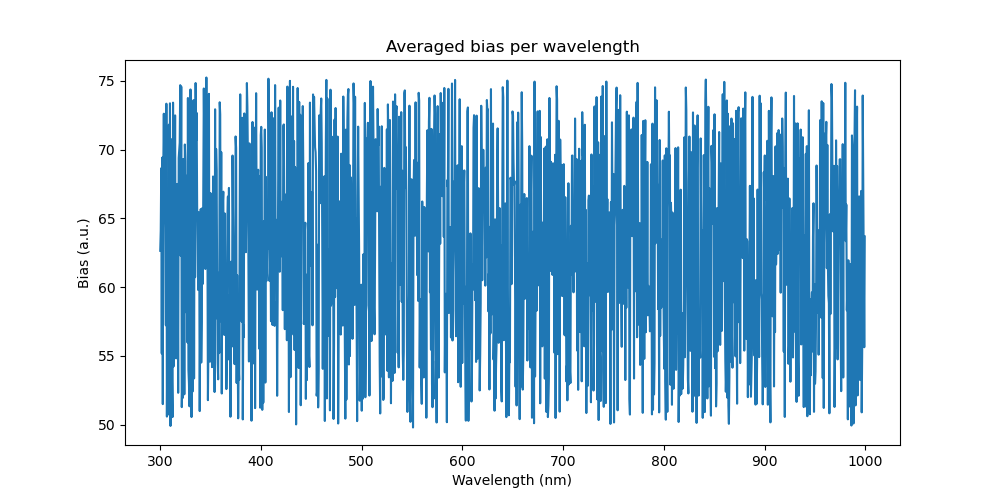

In [11]:
averaged_bias = bias_matrix.mean(axis=1)
wavelengths = np.arange(intensity_range.start, intensity_range.end, 0.509)[:-1]
print(f"Average bias shape: {averaged_bias.shape}")
print(f"Wavelengths shape: {wavelengths.shape}")

plt.figure(figsize=(10, 5))
plt.plot(wavelengths, averaged_bias)
plt.title("Averaged bias per wavelength")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Bias (a.u.)")
plt.show()

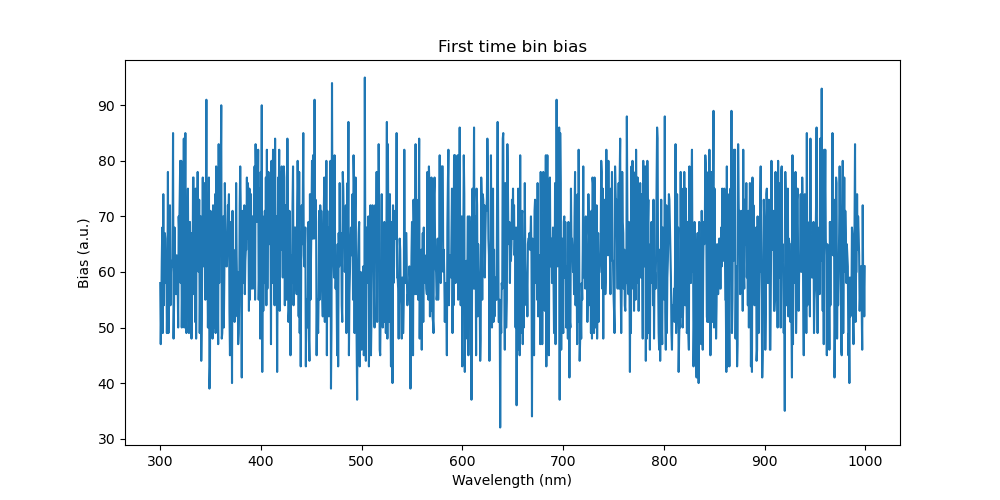

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(wavelengths, bias_matrix[:, 0])
plt.title("First time bin bias")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Bias (a.u.)")
plt.show()

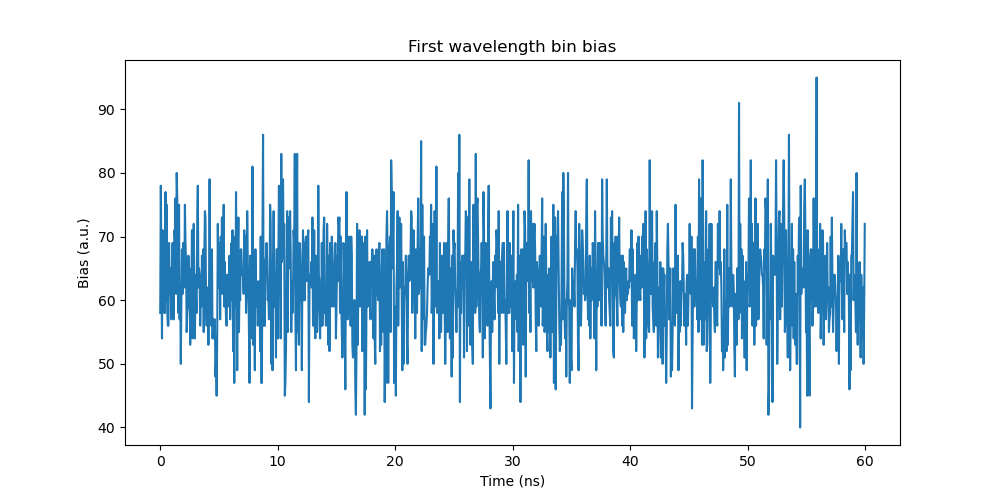

In [13]:
time_axis = np.arange(0, 60, 0.05)
plt.figure(figsize=(10, 5))
plt.plot(time_axis, bias_matrix[0, :])
plt.title("First wavelength bin bias")
plt.xlabel("Time (ns)")
plt.ylabel("Bias (a.u.)")
plt.show()

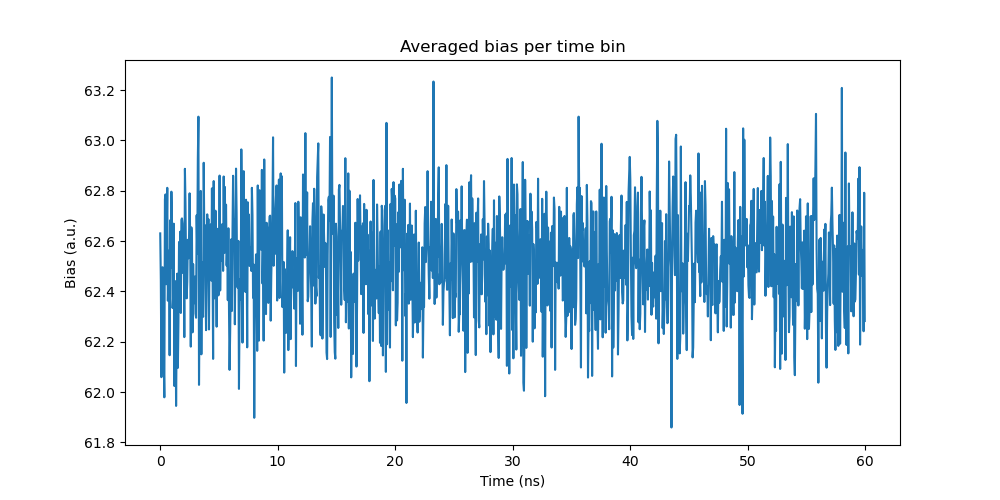

In [14]:
averaged_bias_time = bias_matrix.mean(axis=0)
plt.figure(figsize=(10, 5))
plt.plot(time_axis, averaged_bias_time)
plt.title("Averaged bias per time bin")
plt.xlabel("Time (ns)")
plt.ylabel("Bias (a.u.)")
plt.show()